In [2]:
!pip install dgl

In [3]:
#Importing the libraries
import networkx as nx
import dgl
import matplotlib.pyplot as plt

DGL backend not selected or invalid.  Assuming PyTorch for now.
Using backend: pytorch


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


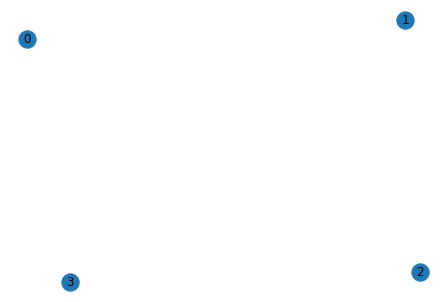

In [4]:
#Creating the Graph
G=nx.Graph()
G.add_nodes_from([0,1,2,3])
nx.draw(G, with_labels=True)
plt.show()

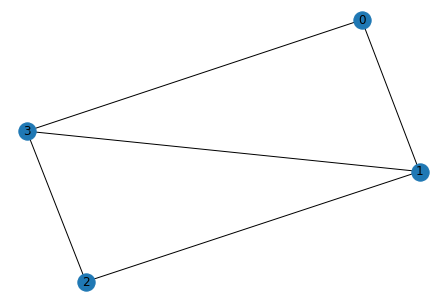

In [6]:
G.add_edges_from([(0,1),(1,3),(2,1),(3,0),(3,2)])
nx.draw(G, with_labels=True)
plt.show()

In [0]:
import numpy as np
#Creating the adjacency matrix
A = np.matrix([
    [0, 1, 0, 1],
    [1, 0, 1, 1], 
    [0, 1, 0, 1],
    [1, 1, 1, 0]],
    dtype=float
)

In [8]:
#Features for every node based on its index
X = np.matrix([
            [i, -i]
            for i in range(A.shape[0])], dtype=float)
X

matrix([[ 0.,  0.],
        [ 1., -1.],
        [ 2., -2.],
        [ 3., -3.]])

In [9]:
#Applying the propogation rule
A * X

matrix([[ 4., -4.],
        [ 5., -5.],
        [ 4., -4.],
        [ 3., -3.]])

In [10]:
I = np.matrix(np.eye(A.shape[0]))
I

matrix([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [11]:
#Adding self loops 
A_hat = A + I
A_hat * X

matrix([[ 4., -4.],
        [ 6., -6.],
        [ 6., -6.],
        [ 6., -6.]])

In [12]:
#Degree matrix
D = np.array(np.sum(A, axis=0))[0]
D = np.matrix(np.diag(D))
D

matrix([[2., 0., 0., 0.],
        [0., 3., 0., 0.],
        [0., 0., 2., 0.],
        [0., 0., 0., 3.]])

In [13]:
#Normalizing the feature representations
D**-1 * A

matrix([[0.        , 0.5       , 0.        , 0.5       ],
        [0.33333333, 0.        , 0.33333333, 0.33333333],
        [0.        , 0.5       , 0.        , 0.5       ],
        [0.33333333, 0.33333333, 0.33333333, 0.        ]])

In [14]:
#Propogation rule with the transformed adjacency matrix
D**-1 * A * X

matrix([[ 2.        , -2.        ],
        [ 1.66666667, -1.66666667],
        [ 2.        , -2.        ],
        [ 1.        , -1.        ]])

In [0]:
W = np.matrix([
             [1, -1],
             [-1, 1]])

In [16]:
#Degree matrix
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))
D_hat

matrix([[3., 0., 0., 0.],
        [0., 4., 0., 0.],
        [0., 0., 3., 0.],
        [0., 0., 0., 4.]])

In [17]:
#Adding the weights
D_hat**-1 * A_hat * X * W

matrix([[ 2.66666667, -2.66666667],
        [ 3.        , -3.        ],
        [ 4.        , -4.        ],
        [ 3.        , -3.        ]])

In [18]:
#Degree matrix
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat**-0.5))
D_hat

matrix([[0.57735027, 0.        , 0.        , 0.        ],
        [0.        , 0.5       , 0.        , 0.        ],
        [0.        , 0.        , 0.57735027, 0.        ],
        [0.        , 0.        , 0.        , 0.5       ]])

In [19]:
#Spectral rule
D_hat* A_hat * D_hat*X

matrix([[ 1.15470054, -1.15470054],
        [ 1.57735027, -1.57735027],
        [ 1.82136721, -1.82136721],
        [ 1.57735027, -1.57735027]])

In [20]:
#Spectral rule
D_hat* A_hat * D_hat*X*W

matrix([[ 2.30940108, -2.30940108],
        [ 3.15470054, -3.15470054],
        [ 3.64273441, -3.64273441],
        [ 3.15470054, -3.15470054]])